In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hypertension-dataset/hypertension_dataset.csv


# Hypertension Risk Prediction 

Hypertension is rising among young adults globally, including university students, due to lifestyle and diet changes. Early prediction can help prevent complications like stroke and heart disease.

This notebook explores a Kaggle hypertension dataset and builds a machine-learning model to predict hypertension risk using demographic and lifestyle factors.


# Importing our libralibraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


# loading  our datasets

In [3]:
df = pd.read_csv("/kaggle/input/hypertension-dataset/hypertension_dataset.csv")
df.head()


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


# Inspect & Understand the Dataset

In [4]:
df.shape

(1985, 11)

In [5]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [7]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [8]:
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Clean Our dataset

In [10]:
# Convert categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['BP_History', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')

In [11]:
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes


# Exploratory Data Analysis (EDA)

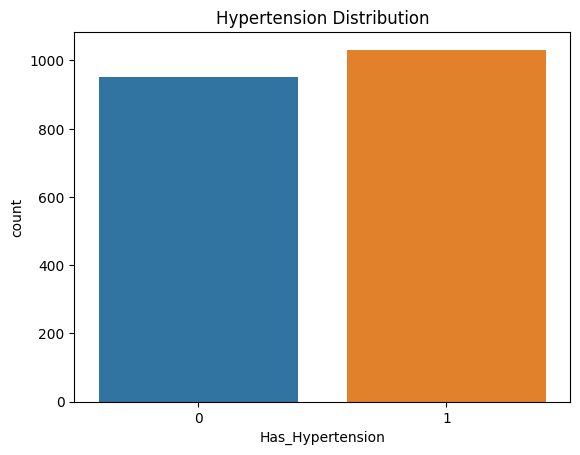

In [12]:
# Hypertension Counts
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Has_Hypertension')
plt.title("Hypertension Distribution")
plt.show()


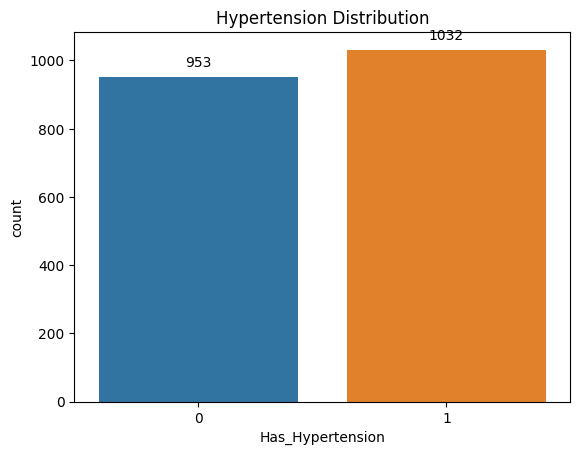

In [13]:
ax = sns.countplot(data=df, x='Has_Hypertension')

# Add labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10), textcoords = 'offset points')

plt.title("Hypertension Distribution")
plt.show()


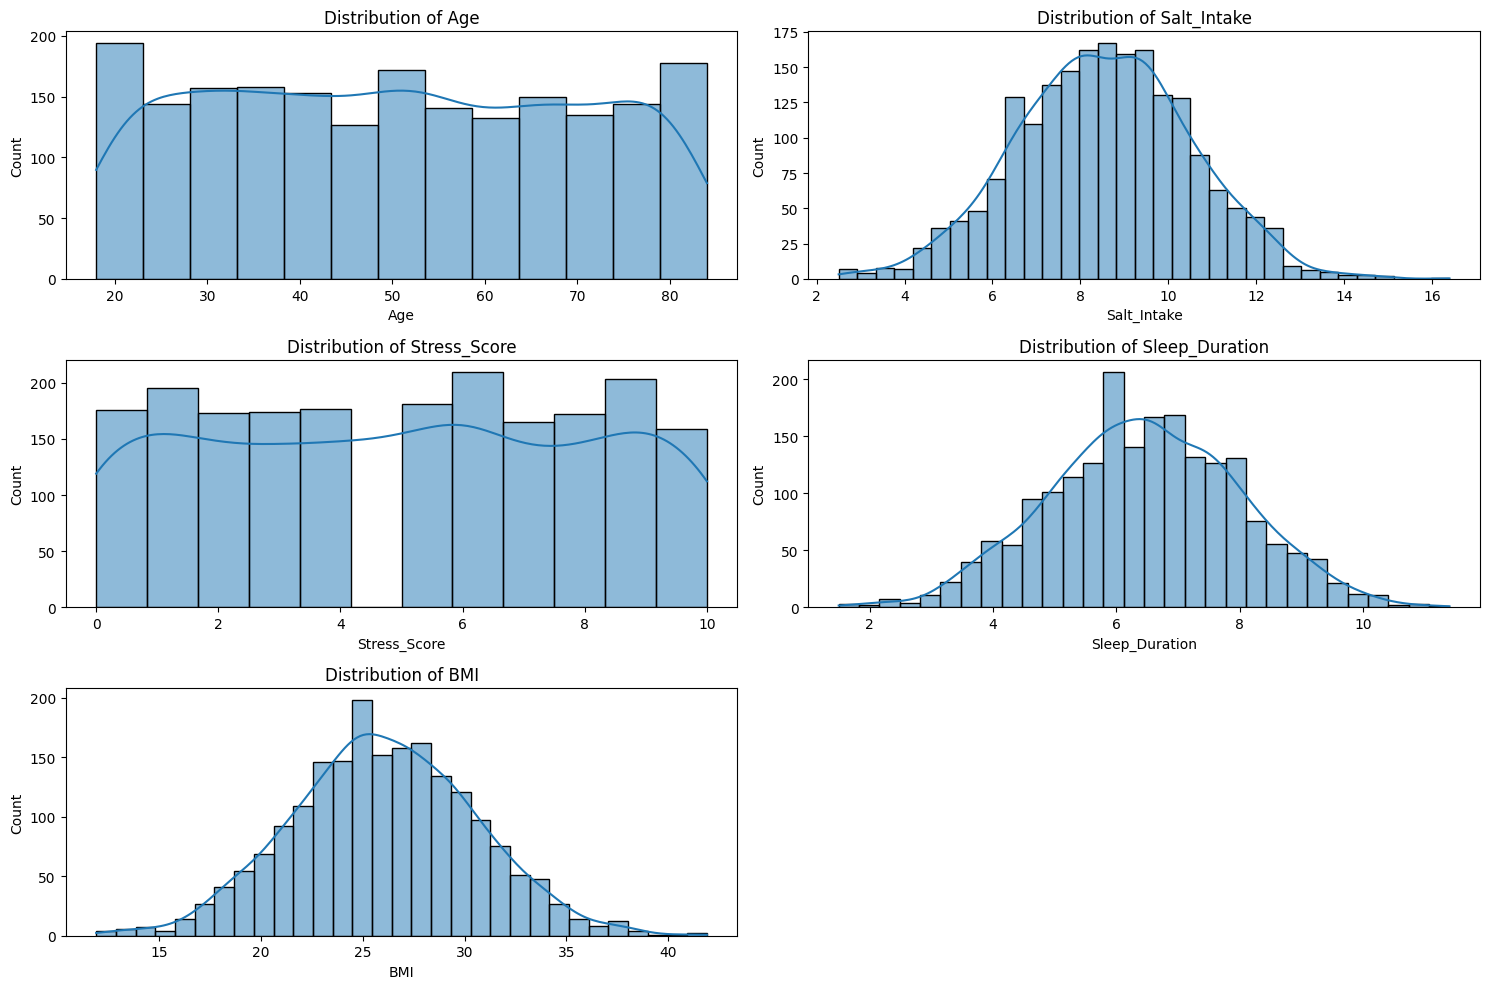

In [14]:
# Distribution of Numerical Features
num_cols = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

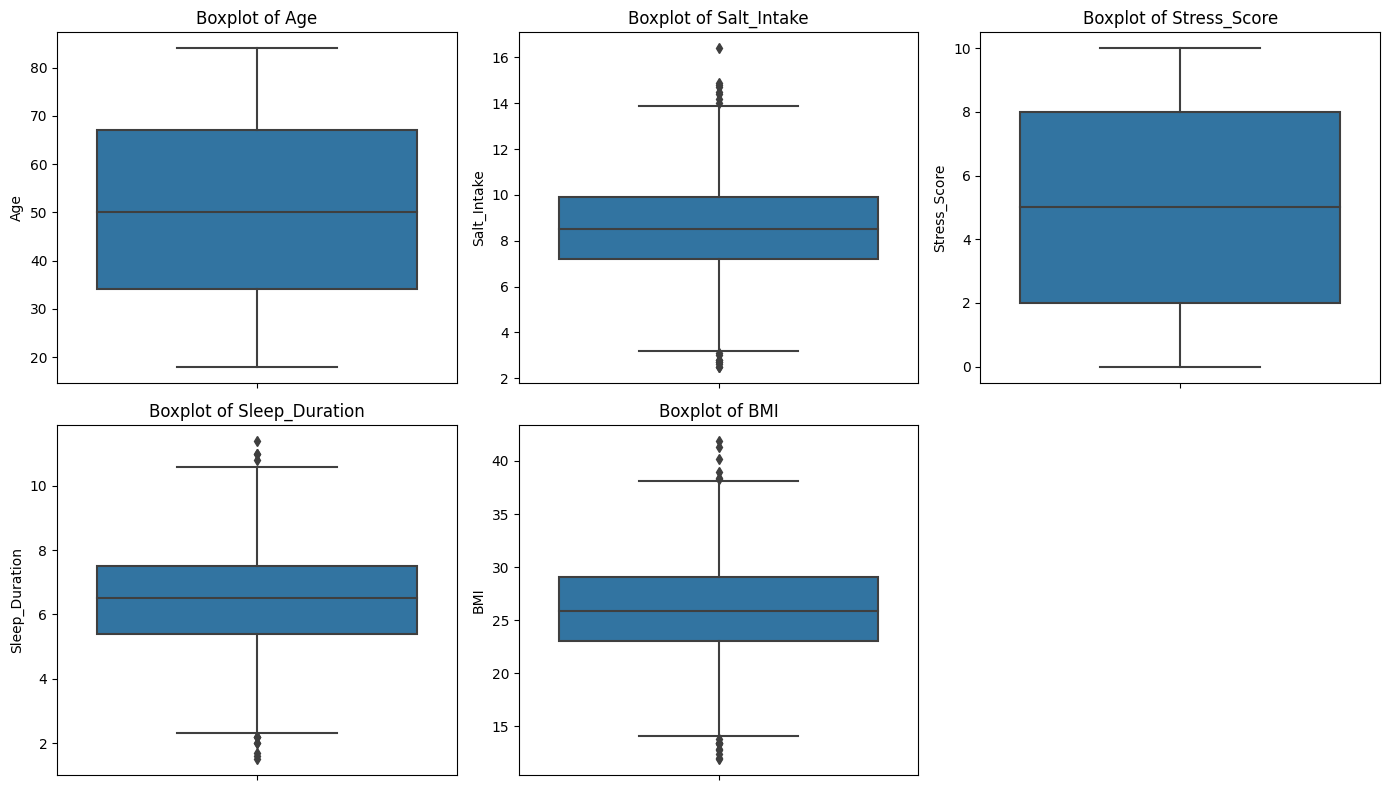

In [15]:
# List of numerical columns
num_cols = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']

plt.figure(figsize=(14, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

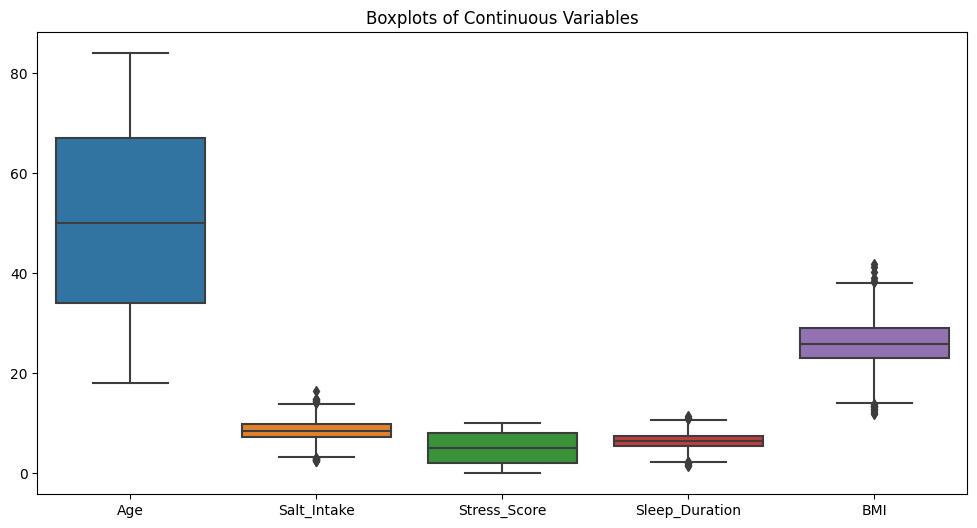

In [16]:
# Boxplot for continuous variables
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']])
plt.title("Boxplots of Continuous Variables")
plt.show()


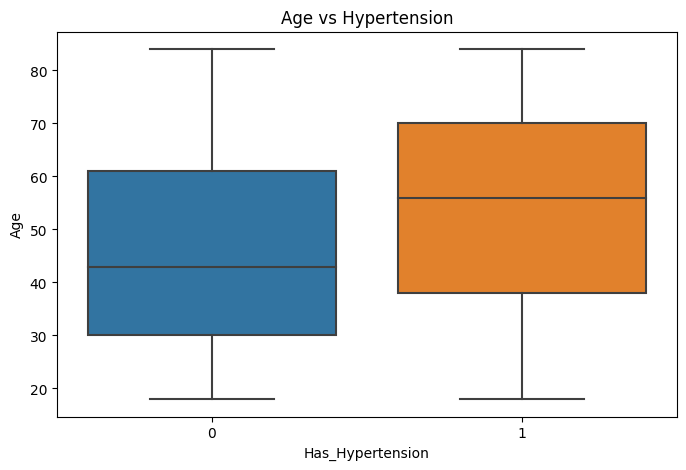

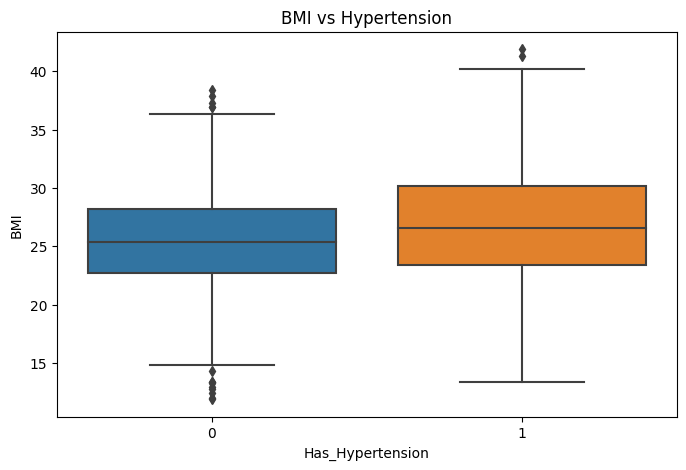

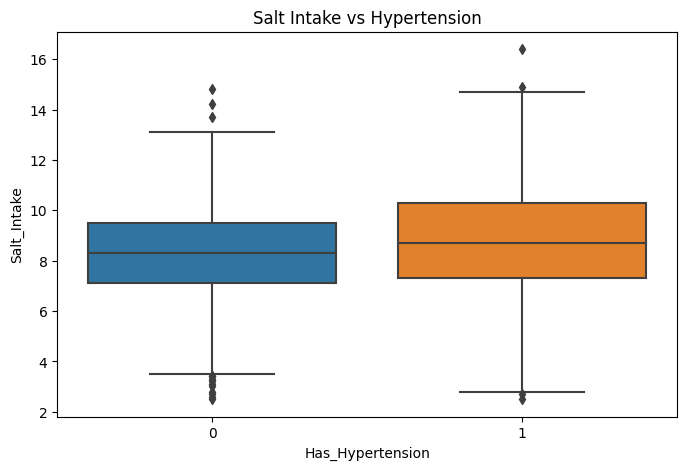

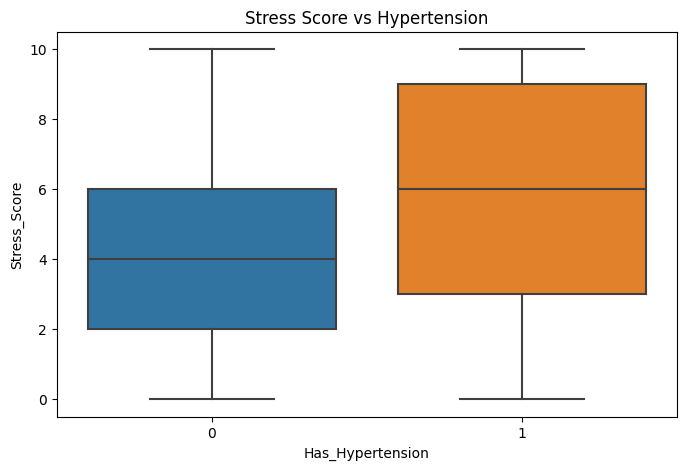

In [17]:
# Age vs Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x='Has_Hypertension', y='Age', data=df)
plt.title("Age vs Hypertension")
plt.show()

# BMI vs Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x='Has_Hypertension', y='BMI', data=df)
plt.title("BMI vs Hypertension")
plt.show()

# Salt Intake vs Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x='Has_Hypertension', y='Salt_Intake', data=df)
plt.title("Salt Intake vs Hypertension")
plt.show()

# Stress Score vs Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x='Has_Hypertension', y='Stress_Score', data=df)
plt.title("Stress Score vs Hypertension")
plt.show()


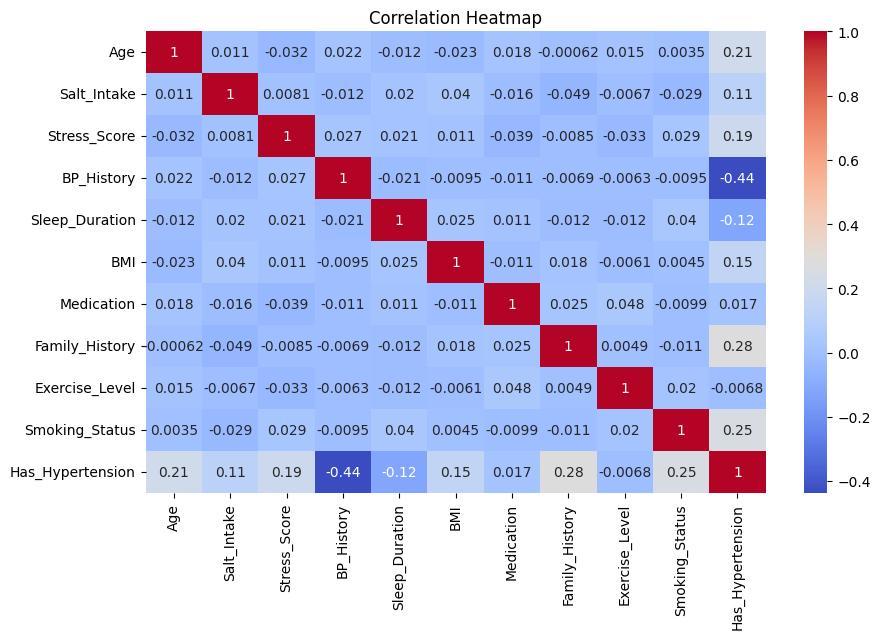

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Prepare Data for Modeling

In [19]:
# Identify Features and Target

# Target
y = df['Has_Hypertension']

# Features (drop target)
X = df.drop('Has_Hypertension', axis=1)


In [20]:
# Check Data Types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1985 non-null   int64  
 1   Salt_Intake     1985 non-null   float64
 2   Stress_Score    1985 non-null   int64  
 3   BP_History      1985 non-null   int8   
 4   Sleep_Duration  1985 non-null   float64
 5   BMI             1985 non-null   float64
 6   Medication      1985 non-null   int8   
 7   Family_History  1985 non-null   int8   
 8   Exercise_Level  1985 non-null   int8   
 9   Smoking_Status  1985 non-null   int8   
dtypes: float64(3), int64(2), int8(5)
memory usage: 87.4 KB


In [21]:
categorical_cols = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status']

# Convert to numeric codes
for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes


In [22]:
X.head()


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status
0,69,8.0,9,1,6.4,25.8,0,1,1,0
1,32,11.7,10,1,5.4,23.4,0,0,1,0
2,78,9.5,3,1,7.1,18.7,0,0,2,0
3,38,10.0,10,0,4.2,22.1,1,0,1,0
4,41,9.8,1,2,5.8,16.2,4,0,2,0


In [23]:
# Train-Test Split Split the dataset into 80% training, 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
# Scaling improves performance for algorithms like Logistic Regression:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
#Train the Model
# Initialize Logistic Regression
log_model = LogisticRegression(random_state=42)

# Fit the model on scaled training data
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [27]:
# Make Predictions
y_pred_log = log_model.predict(X_test_scaled)


In [28]:
#Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       191
           1       0.84      0.81      0.82       206

    accuracy                           0.82       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.82      0.82      0.82       397

Confusion Matrix:
 [[159  32]
 [ 39 167]]


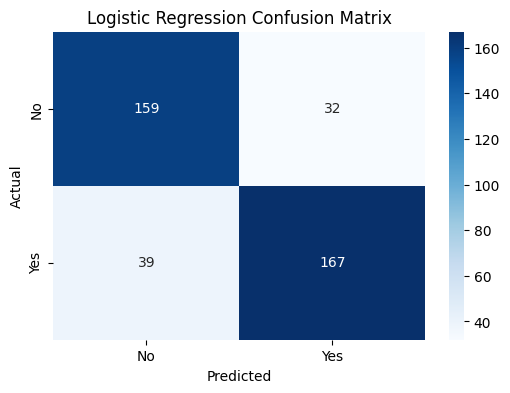

In [29]:
# Visualizing confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [31]:
# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test_scaled)


In [33]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Random Forest Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       191
           1       0.97      0.98      0.97       206

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397

Confusion Matrix:
 [[184   7]
 [  4 202]]


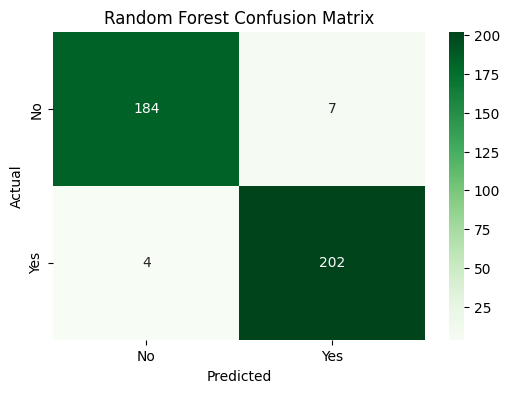

In [34]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

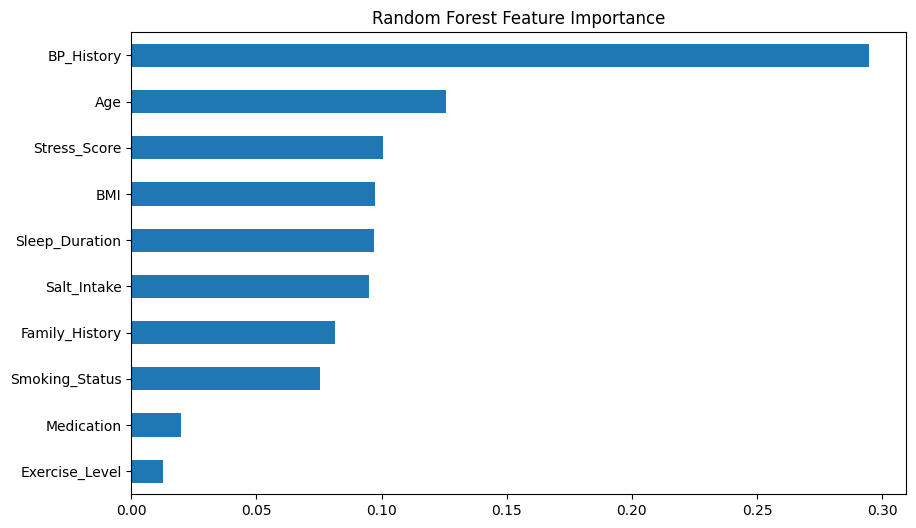

In [35]:
# Feature Importance

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.show()

# Key Insights & Conclusion
Model Performance

Random Forest Accuracy: 97% — significantly higher than Logistic Regression (82%), indicating excellent predictive power for hypertension risk.

Classification Report: Both classes (Hypertensive and Non-Hypertensive) have precision, recall, and F1-scores around 97%, showing balanced performance.

Confusion Matrix: Only 11 misclassifications out of 397 individuals, demonstrating the model reliably identifies both hypertensive and non-hypertensive cases.

Top Predictors of Hypertension

Based on Random Forest feature importance:

BP_History (29%) – strongest predictor, highlighting the importance of past blood pressure trends.

Age (12.5%) – older individuals are at higher risk.

Stress_Score (10%), BMI (9.7%), Sleep_Duration (9.7%), Salt_Intake (9.5%) – lifestyle and physiological factors significantly contribute to hypertension risk.

Family_History (8.1%) and Smoking_Status (7.5%) – also relevant but less influential.

Features like Medication (2%) and Exercise_Level (1.3%) had lower predictive impact in this dataset.

Practical Insights

BMI, Age, and BP History are the most critical factors for identifying hypertension risk among youth.

Lifestyle factors such as stress, sleep duration, and salt intake also play measurable roles.

These insights can guide public health interventions (e.g., awareness campaigns on diet, stress management, and regular BP monitoring).

Next Steps

Public Health Applications: Target interventions for high-risk groups identified by the model.

Model Deployment: Develop a dashboard or API to predict individual hypertension risk, which can be used by healthcare providers or community health programs.

Further Research: Incorporate more granular data (e.g., diet, exercise patterns, and socio-economic factors) to improve predictions and applicability in different populations.